<a href="https://colab.research.google.com/github/panimesh14/Exploratory-Data-Analysis-Modeling/blob/main/Diabetes_Prediction_Modeling_using_Ensemble_Models_on_Pima_Indians_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Diabetes Prediction Modeling using Ensemble Model on Pima Indians Dataset

######Pregnancies: Number of times pregnant
######Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
######BloodPressure: Diastolic blood pressure (mm Hg)
######SkinThickness: Triceps skin fold thickness (mm)
######Insulin: 2-Hour serum insulin (mu U/ml)
######BMI: Body mass index (weight in kg/(height in m)^2)
######DiabetesPedigreeFunction: Diabetes pedigree function
######Age: Age (years)
######Outcome: Class variable (0 or 1)
#Source:https://data.world/data-society/pima-indians-diabetes-database

In [658]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [659]:
df=pd.read_csv('pima-indians-diabetes.csv')
df.head(10)
#Column/Field heads improper 
#Source for info about the heads

,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0
5,3,78,50,32,88,31.0,0.248,26,1
6,10,115,0,0,0,35.3,0.134,29,0
7,2,197,70,45,543,30.5,0.158,53,1
8,8,125,96,0,0,0.0,0.232,54,1
9,4,110,92,0,0,37.6,0.191,30,0


In [660]:
#Columns coded/unnamed
df.columns

Index(['6', '148', '72', '35', '0', '33.6', '0.627', '50', '1'], dtype='object')

In [661]:
columns=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome']
#From source

In [662]:
df.info()
#Integers and floats with 8 features and 1 target

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   6       767 non-null    int64  
 1   148     767 non-null    int64  
 2   72      767 non-null    int64  
 3   35      767 non-null    int64  
 4   0       767 non-null    int64  
 5   33.6    767 non-null    float64
 6   0.627   767 non-null    float64
 7   50      767 non-null    int64  
 8   1       767 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [663]:
df.columns=columns
df.head()
#Reassigning columnns

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [664]:
df.describe().transpose()
#Stats description

,count,mean,std,min,25%,50%,75%,max
Pregnancies,767.0,3.842243,3.370877,0.000,1.0000,3.000,6.000,17.00
Glucose,767.0,120.859192,31.978468,0.000,99.0000,117.000,140.000,199.00
BloodPressure,767.0,69.101695,19.368155,0.000,62.0000,72.000,80.000,122.00
SkinThickness,767.0,20.517601,15.954059,0.000,0.0000,23.000,32.000,99.00
Insulin,767.0,79.903520,115.283105,0.000,0.0000,32.000,127.500,846.00
BMI,767.0,31.990482,7.889091,0.000,27.3000,32.000,36.600,67.10
DiabetesPedigreeFunction,767.0,0.471674,0.331497,0.078,0.2435,0.371,0.625,2.42
Age,767.0,33.219035,11.752296,21.000,24.0000,29.000,41.000,81.00
Outcome,767.0,0.348110,0.476682,0.000,0.0000,0.000,1.000,1.00


In [665]:
df['Outcome'].value_counts()
#Categorical target as expected

0    500
1    267
Name: Outcome, dtype: int64

In [666]:
#Data Cleaning 
df.columns
#for reference

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [667]:
df.dtypes
#Outcome is a categorical variable with 0 or 1 as negative or positive test respectively

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [668]:
df.Glucose.describe()
#0 minimum for glucose is unusual
#0 maybe indicator of missing, misassigned, error in measurement

count    767.000000
mean     120.859192
std       31.978468
min        0.000000
25%       99.000000
50%      117.000000
75%      140.000000
max      199.000000
Name: Glucose, dtype: float64

In [669]:
df.BloodPressure.describe()
#0 Blood Pressure is again unusual 
#0 may point to data errors, missing value, misalignment

count    767.000000
mean      69.101695
std       19.368155
min        0.000000
25%       62.000000
50%       72.000000
75%       80.000000
max      122.000000
Name: BloodPressure, dtype: float64

In [670]:
df.SkinThickness.describe()
#0 Skin thickness (in mm) as minimum and 25 percentile values is unusual

count    767.000000
mean      20.517601
std       15.954059
min        0.000000
25%        0.000000
50%       23.000000
75%       32.000000
max       99.000000
Name: SkinThickness, dtype: float64

In [671]:
df.Insulin.describe()
#2 hour Insulin levels of minimum and 1st quartile of 0  is unusual 
#0 may point to some error in measurement

count    767.000000
mean      79.903520
std      115.283105
min        0.000000
25%        0.000000
50%       32.000000
75%      127.500000
max      846.000000
Name: Insulin, dtype: float64

In [672]:
df.BMI.describe()
#0 BMI is highly unusual 
#0 BMI may be mark of some error

count    767.000000
mean      31.990482
std        7.889091
min        0.000000
25%       27.300000
50%       32.000000
75%       36.600000
max       67.100000
Name: BMI, dtype: float64

In [673]:
df.DiabetesPedigreeFunction.describe()
#Values seem reasonable from stats

count    767.000000
mean       0.471674
std        0.331497
min        0.078000
25%        0.243500
50%        0.371000
75%        0.625000
max        2.420000
Name: DiabetesPedigreeFunction, dtype: float64

0.078

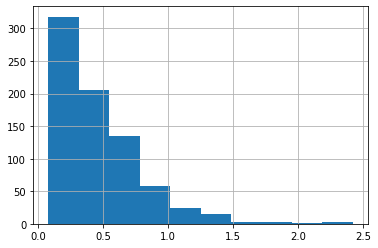

In [674]:
df.DiabetesPedigreeFunction.hist()
df.DiabetesPedigreeFunction.min()
#Distribution seems reasonable although even from source it remains bit unclear regarding DiabetesPedigreeFunction
#Histogram appears reasonable with minimum value at 0.078

[ 1  8  0  5  3 10  2  4  7  9 11 13  6 15 17 12 14]


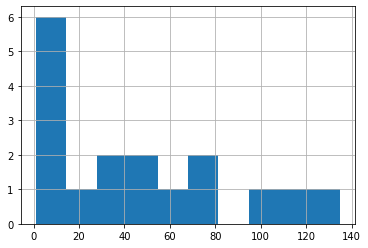

In [675]:

print(df.Pregnancies.unique())
df.Pregnancies.value_counts().hist(bins=10)
#17 unique values in frequency chart
#Reasonable Values and Distribution of feature
#6 seems to be most frequent value for any record

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


count    767.000000
mean      33.219035
std       11.752296
min       21.000000
25%       24.000000
50%       29.000000
75%       41.000000
max       81.000000
Name: Age, dtype: float64

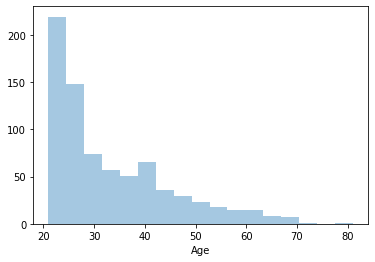

In [676]:
sns.distplot(df.Age,kde=False)
df.Age.describe()
#Distributikn and stats seem reasonable

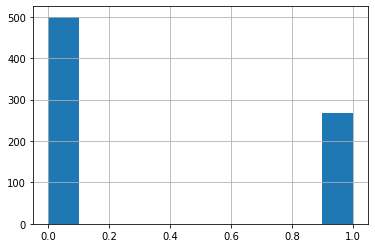

In [677]:
df['Outcome'].hist()
#Imbalanced Target Labels Distribution

##### Glucose, Blood Pressure, Skin Thickness, Insulin, BMI may require reassignment and checking for abnormal 0 values. These maybe reassigned as Nan as they appear missed, mistaken, misassigned and doubtful in outlook and relevance.
##### DiabetesPedigreeFunction, Pregnancies,Age seem fine. 
##### Data Imbalance maybe another important issue for target label Outcome.

In [678]:
#Data Cleaning
df_zeros=df#replaced zeros with nan
feat=['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
df_zeros[feat]=df_zeros[feat].replace(0,np.nan)
df_zeros['Glucose'].nunique()

135

In [679]:
df_zeros.isnull().sum()
#quite a lot of nulls in Insulin, SkinThickness

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     373
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [680]:
100*df_zeros.isnull().sum()/len(df_zeros)
#48.6% null values in Insulin seem botched.
#29.5% null values in skin thickness
#Glucose, BMI, BloodPressure have less than 5% null values which is reasonable for 767 records

Pregnancies                  0.000000
Glucose                      0.651890
BloodPressure                4.563233
SkinThickness               29.595828
Insulin                     48.631030
BMI                          1.434159
DiabetesPedigreeFunction     0.000000
Age                          0.000000
Outcome                      0.000000
dtype: float64

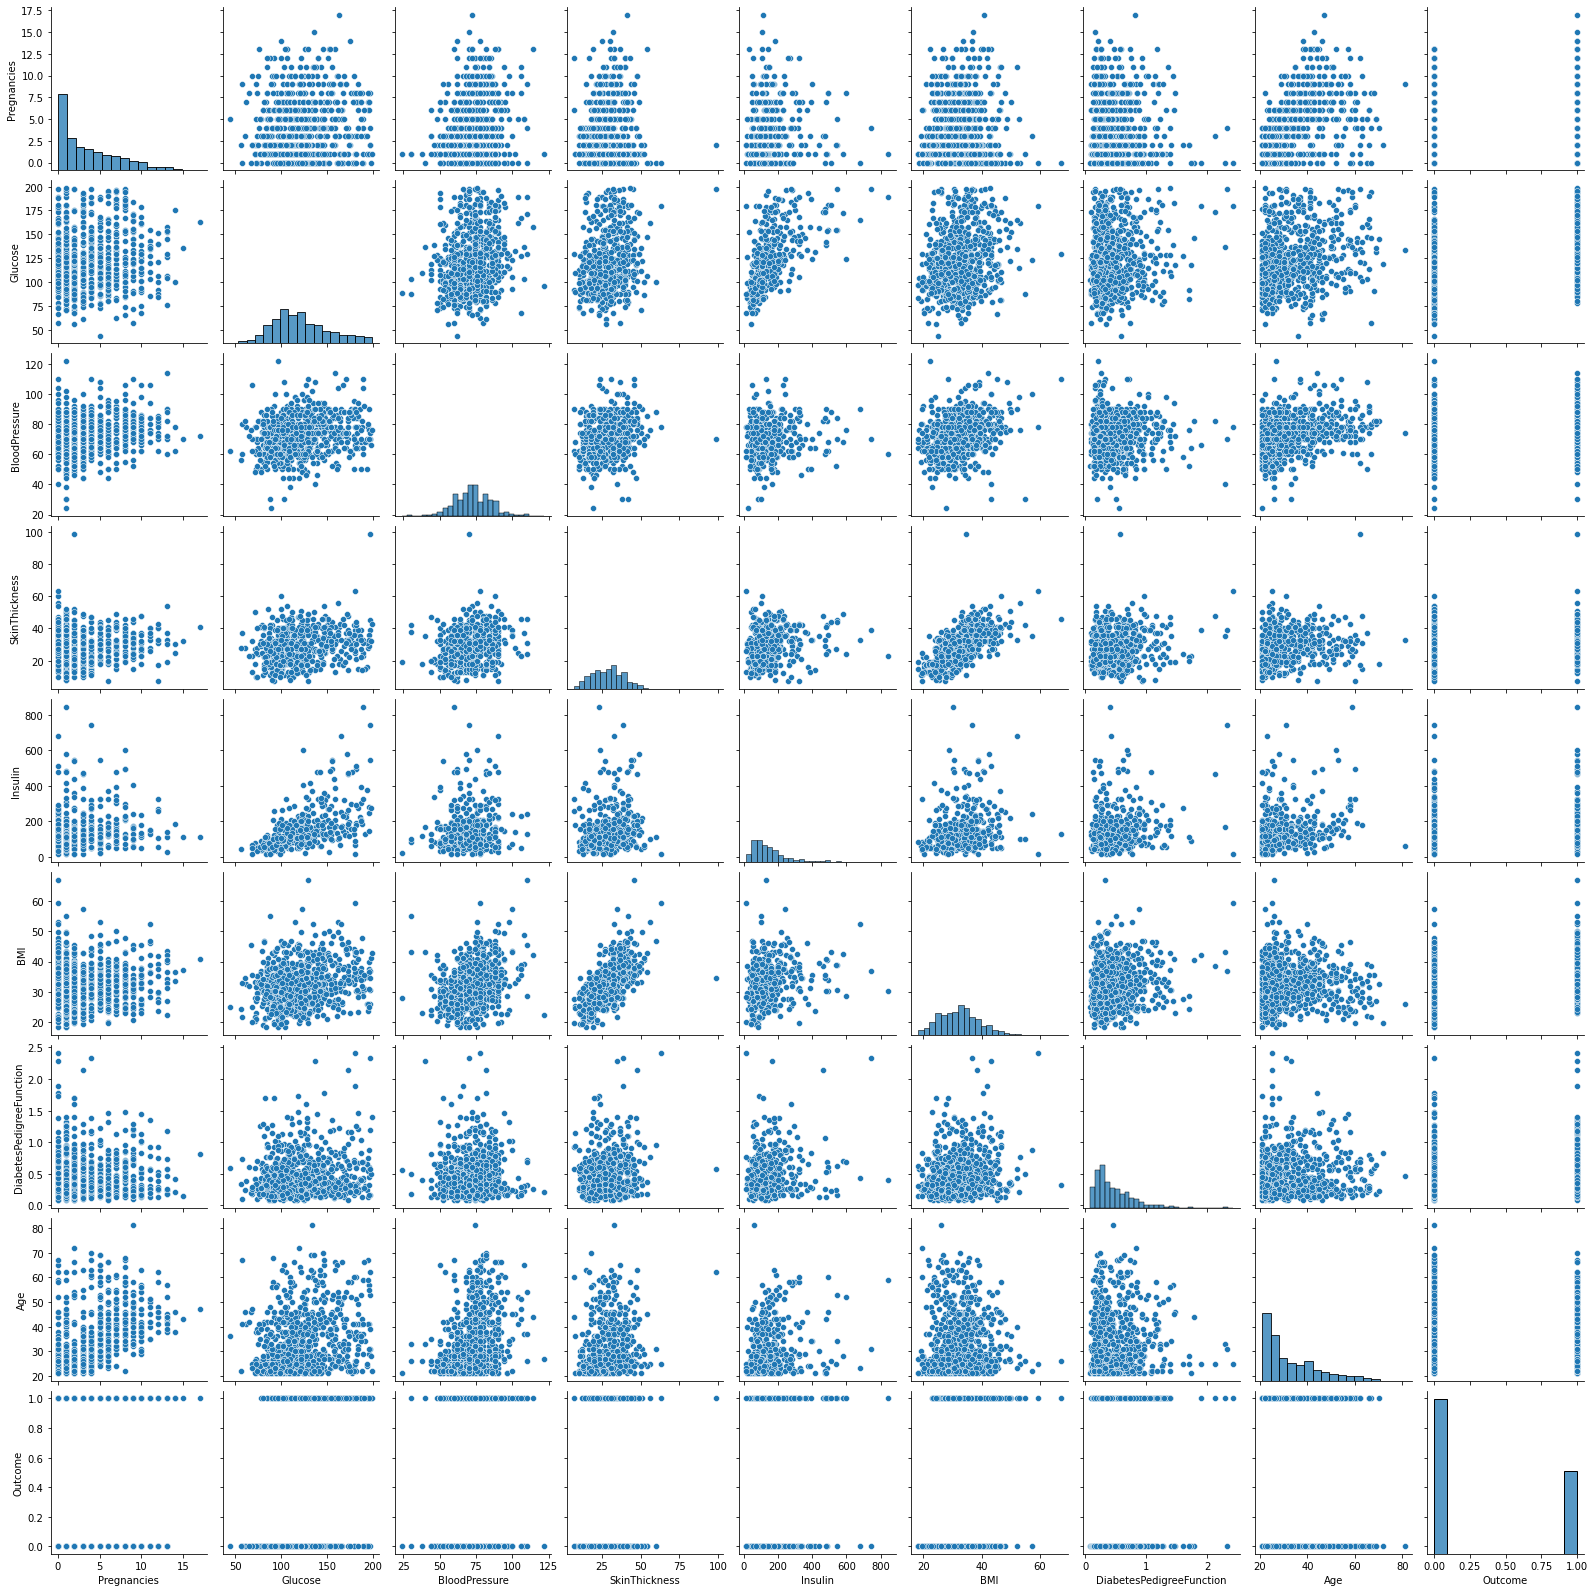

In [681]:
sns.pairplot(df_zeros)
#Insulin shows good correlation with most other feature
#Skin Thickness shows correlation with almost all features too especially Age, BMI, Insulin
#BP shows good correlation with BMI, Age, Glucose
#BMI shows correlation with Skin Thickness, Age and Insulin alone
#Glucose has good correlation with BMI, Insulin

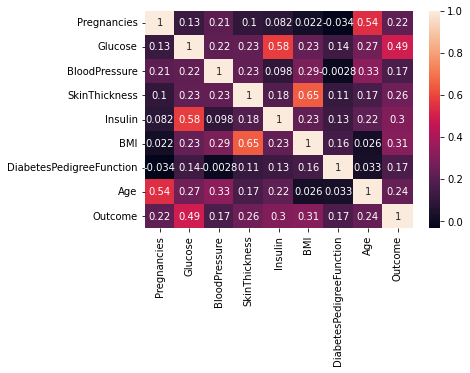

In [682]:
sns.heatmap(df_zeros.corr(),annot=True)
#Quantitative estimates appear better
#Insulin-Glucose heavily and positively correlated-0.58 
#BMI-SkinThickness are positively correlated 
#Age-Pregnancies also show high positive correlation
#Glcuose-Outcome show highest positive correlation amongst features
#Insulin,  Skin Thickness, BMI also shows overall good correlation 
#BloodPressure shows relatively weak but positive correlation like DiabetesPedigreeFunction

In [683]:
#Data Preparation and Model Building
#Dropping all records with null
df_zeros_drop=df_zeros.dropna()
df_zeros_drop.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [684]:
#Scaling & Normalizing Data (Dropped Nan Records)
from sklearn.preprocessing import MinMaxScaler
scaler_drop=MinMaxScaler()
scaler_drop.fit(df_zeros_drop)
df_zeros_drop_scaled=scaler_drop.transform(df_zeros_drop)

In [685]:
#Using Median as a fill
from sklearn.impute import SimpleImputer
simputer=SimpleImputer(missing_values=np.nan,strategy='median')
df_zeros_imp=simputer.fit_transform(df_zeros)
sum(np.isnan(df_zeros_imp))#Nulls imputed with median, .fillna(df_zeros.median) is an alternative. Used imputed for trial and practice here

array([0, 0, 0, 0, 0, 0, 0, 0, 0])

In [686]:
#Scaling & Normalizing Data (Dropped Nan Records)
from sklearn.preprocessing import MinMaxScaler
scaler_imp=MinMaxScaler()
scaler_imp.fit(df_zeros_imp)
df_zeros_imp_scaled=scaler_drop.transform(df_zeros_imp)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"


In [687]:
#splitting target variables
def split_target(df,target):
    X=df.drop(target,axis=1);
    y=df[target];
    return X,y

In [688]:
#X_drop,y_drop=split_target(df_zeros_drop_scaled,'Outcome')
X_drop=df_zeros_drop_scaled[:,:-1]
y_drop=df_zeros_drop_scaled[:,-1]
X_imp=df_zeros_imp_scaled[:,:-1]
y_imp=df_zeros_imp_scaled[:,-1]
X_imp.shape

(767, 8)

In [689]:
#Model Building
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_val_score

In [690]:
#For nan dropped records
rfc_drop=RandomForestClassifier(n_estimators=100,max_depth=7,criterion='gini')
result_drop=cross_val_score(rfc_drop,X_drop,y_drop,cv=kfold,scoring='accuracy')
print('Mean Accuracy for Dropped:',np.mean(result_drop))

Mean Accuracy for Dropped: 0.7652061019149626


In [691]:
rfc_imp=RandomForestClassifier(n_estimators=100,max_depth=7,criterion='gini')
kfold=KFold(n_splits=5,shuffle=True)
result_imp=cross_val_score(rfc_imp,X_imp,y_imp,cv=kfold,scoring='accuracy')
print('Accuracy for Imputed Data',np.mean(result))

Accuracy for Imputed Data 0.7679314149902384


#####Dropping Records seem to give better accuracy than Imputed Records on Cross Validation
#####Need to check other clasaification metrics

In [692]:
from sklearn.model_selection import train_test_split
X_drop_train,X_drop_test,y_drop_train,y_drop_test=train_test_split(X_drop,y_drop,test_size=0.3)
X_drop_train.shape#since records dropped

(274, 8)

In [693]:
rfc_drop.fit(X_drop_train,y_drop_train)

RandomForestClassifier(max_depth=7)

In [694]:
from sklearn.model_selection import train_test_split
X_imp_train,X_imp_test,y_imp_train,y_imp_test=train_test_split(X_imp,y_imp,test_size=0.3)
X_imp_train.shape#imputed so records remain unchanged

(536, 8)

In [695]:
rfc_imp.fit(X_imp_train,y_imp_train)

RandomForestClassifier(max_depth=7)

In [696]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_drop_test,rfc_drop.predict(X_drop_test)))

              precision    recall  f1-score   support

         0.0       0.83      0.89      0.86        79
         1.0       0.74      0.64      0.68        39

    accuracy                           0.81       118
   macro avg       0.78      0.76      0.77       118
weighted avg       0.80      0.81      0.80       118



In [697]:
print(classification_report(y_imp_test,rfc_imp.predict(X_imp_test)))

              precision    recall  f1-score   support

         0.0       0.80      0.85      0.82       147
         1.0       0.70      0.62      0.66        84

    accuracy                           0.77       231
   macro avg       0.75      0.73      0.74       231
weighted avg       0.76      0.77      0.76       231



##### Imputed Values Model gives more optimal precision, recall and F1 score than Dropped Values Model.

In [698]:

#Applying Droppes Trained RFC model to original dropped model dataset
print(confusion_matrix(y_drop,rfc_drop.predict(X_drop))/len(X_drop))

[[0.64540816 0.02295918]
 [0.04081633 0.29081633]]


In [699]:
#Applying Imputed Trained RFC Model to original Dropped Value dataset
confusion_matrix(y_drop,rfc_imp.predict(X_drop))/len(X_drop)

array([[0.63265306, 0.03571429],
       [0.05867347, 0.27295918]])

##### On comparison, Dropped Model gives just slightly more True Positives while Imputed Model gives more True Negatives
#####False positives and False negatives are also more or less comparable.
##### However, from classification report model precision, recall and F1 score are higher for imputed model.

In [709]:

#Multilayer Perceptron Neural Network
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model=Sequential()
model.add(Dense(4,activation='relu'))
model.add(Dense(2,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
from tensorflow.keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor='val_loss',patience=3)

In [710]:
model.fit(X_imp_train,y_imp_train,validation_split=0.2,epochs=200,callbacks=[early_stop])

Epoch 1/200
14/14 [==============================] - 1s 13ms/step - loss: 0.6983 - accuracy: 0.4533 - val_loss: 0.6979 - val_accuracy: 0.5463
Epoch 2/200
14/14 [==============================] - 0s 4ms/step - loss: 0.6890 - accuracy: 0.5794 - val_loss: 0.6922 - val_accuracy: 0.5185
Epoch 3/200
14/14 [==============================] - 0s 4ms/step - loss: 0.6802 - accuracy: 0.6542 - val_loss: 0.6882 - val_accuracy: 0.5556
Epoch 4/200
14/14 [==============================] - 0s 5ms/step - loss: 0.6740 - accuracy: 0.6682 - val_loss: 0.6855 - val_accuracy: 0.6019
Epoch 5/200
14/14 [==============================] - 0s 5ms/step - loss: 0.6689 - accuracy: 0.6729 - val_loss: 0.6836 - val_accuracy: 0.6019
Epoch 6/200
14/14 [==============================] - 0s 3ms/step - loss: 0.6655 - accuracy: 0.6729 - val_loss: 0.6820 - val_accuracy: 0.6019
Epoch 7/200
14/14 [==============================] - 0s 5ms/step - loss: 0.6615 - accuracy: 0.6729 - val_loss: 0.6807 - val_accuracy: 0.6019
Epoch 8/200


In [711]:
df_losses=pd.DataFrame(model.history.history)

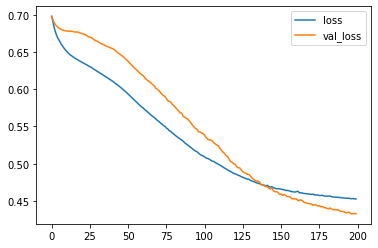

In [712]:
df_losses[['loss','val_loss']].plot()

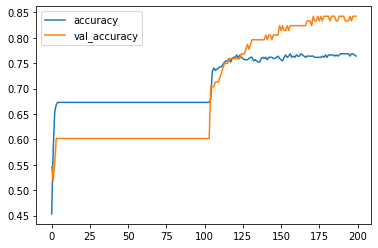

In [713]:
df_losses[['accuracy','val_accuracy']].plot()

In [714]:
threshold=0.5;#can be modeled for least false negatives or Type-II error
y_imp_pred=model.predict(X_imp_test)
y_imp_pred=np.where(y_imp_pred>threshold,1,0)
print(classification_report(y_imp_test,y_imp_pred))

              precision    recall  f1-score   support

         0.0       0.80      0.80      0.80       147
         1.0       0.65      0.64      0.65        84

    accuracy                           0.74       231
   macro avg       0.72      0.72      0.72       231
weighted avg       0.74      0.74      0.74       231



In [715]:
print(confusion_matrix(y_imp_test,y_imp_pred))

[[118  29]
 [ 30  54]]


In [716]:
print(confusion_matrix(y_imp_test,rfc_imp.predict(X_imp_test)))

[[125  22]
 [ 32  52]]


In [717]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda_model=LinearDiscriminantAnalysis()
lda_model.fit(X_imp_train,y_imp_train)
y_pred_lda=lda_model.predict(X_imp_test)
print(confusion_matrix(y_imp_test,y_pred_lda))

[[128  19]
 [ 37  47]]
